In [1]:
import pandas as pd
import numpy as np
import oracledb
from sqlalchemy import create_engine
import os
import glob
pd.set_option('display.max_columns',100)
import time
import seaborn as sns
import matplotlib.pyplot as plt

# A. Query Data

In [2]:
# credentials
username = os.environ['DBA_USR']
password = os.environ['DBA_PW']
host = '10.220.50.121'
port = '1661'
service_name = 'ANALYTIC'

In [3]:
connection_string = f'oracle+oracledb://{username}:{password}@{host}:{port}/?service_name={service_name}'

In [4]:
# create engine
engine = create_engine(connection_string)

In [5]:
# create list of all dates
allDates = ['20241031','20240930','20240829','20240731','20240628','20240531',
            '20240430','20240329','20240229','20240131','20231229','20231130']
# no dpd for <202404

In [6]:
# open sql file 360
with open("CCPull_CUST360.sql", 'r') as file:
    query_360 = file.read()

# open sql PORTFOLIO
with open("CCPull_CUSTPORT.sql", 'r') as file:
    query_PORTFOLIO = file.read()

In [7]:
# print(query_template.format(dt='20241031'))

In [ ]:
allMLs = []
for date in allDates:
    yearmonth = date[2:6]
    if int(date) > 20240329:
        try:
            # print in case of errors
            print(f'Running {date}')

            # open and read the file as a single buffer
            sqlQuery = query_360.format(dt=date)

            # run query and store data in df
            print('SQL run')
            with engine.connect() as connection:
                ML = pd.read_sql(sqlQuery, connection) 
            print(f'{date} queried successfully')

            # change column names into UPPER CASE
            ML.columns = [x.upper() for x in ML.columns]
        except Exception as e:
            print(e)
            ML = pd.DataFrame()
        finally:
            allMLs.append(ML)

            time.sleep(5)
    else:
        try:
            # print in case of errors
            print(f'Running {date}')

            # open and read the file as a single buffer
            sqlQuery = query_PORTFOLIO.format(dt=date, ym=yearmonth)

            # run query and store data in df
            print('SQL run')
            with engine.connect() as connection:
                ML = pd.read_sql(sqlQuery, connection) 
            print(f'{date} queried successfully')

            # change column names into UPPER CASE
            ML.columns = [x.upper() for x in ML.columns]
        except Exception as e:
            print(e)
            ML = pd.DataFrame()
        finally:
            allMLs.append(ML)

            time.sleep(5)


Running 20241031
SQL run


In [ ]:
allMLs[10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186569 entries, 0 to 186568
Data columns (total 78 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   BASE_DT           186569 non-null  object        
 1   AGREE_ID          186569 non-null  object        
 2   GCIF_NO           186569 non-null  object        
 3   CIF_NO            186569 non-null  object        
 4   NOTE_NO           186569 non-null  object        
 5   PRD_TP            186569 non-null  object        
 6   PRD_NM            186569 non-null  object        
 7   PRD_SEGMENT       186569 non-null  object        
 8   ORG_LMT_AMT       186569 non-null  float64       
 9   CURR_LMT_AMT      186569 non-null  float64       
 10  BAL               186569 non-null  float64       
 11  ORIG_INT_RT       186569 non-null  float64       
 12  CURR_INT_RT       186569 non-null  float64       
 13  OTH_CURR_INT_RT   186569 non-null  float64       
 14  CLCT

# B. EDA

In [ ]:
# concat all MLs into one
MLs = pd.concat(allMLs, ignore_index=True)

C:\Users\MR38804\AppData\Local\Temp\ipykernel_16420\416592903.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MLs = pd.concat(allMLs, ignore_index=True)
C:\Users\MR38804\AppData\Local\Temp\ipykernel_16420\416592903.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MLs = pd.concat(allMLs, ignore_index=True)


In [ ]:
MLs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995100 entries, 0 to 1995099
Data columns (total 78 columns):
 #   Column            Dtype         
---  ------            -----         
 0   BASE_DT           object        
 1   AGREE_ID          object        
 2   GCIF_NO           object        
 3   CIF_NO            object        
 4   NOTE_NO           object        
 5   PRD_TP            object        
 6   PRD_NM            object        
 7   PRD_SEGMENT       object        
 8   ORG_LMT_AMT       float64       
 9   CURR_LMT_AMT      float64       
 10  BAL               float64       
 11  ORIG_INT_RT       float64       
 12  CURR_INT_RT       float64       
 13  OTH_CURR_INT_RT   float64       
 14  CLCT_RTNG_FCL     object        
 15  ALLOW_PCT         float64       
 16  ALLOW_PCT_ADD     float64       
 17  RESTRUCT_CD       object        
 18  PASTDUE_SINCE_DT  object        
 19  PASTDUE_DAYS      object        
 20  WRITE_OFF_AMT     float64       
 21  WRITE_OF

In [ ]:
MLs.columns

Index(['BASE_DT', 'AGREE_ID', 'GCIF_NO', 'CIF_NO', 'NOTE_NO', 'PRD_TP',
       'PRD_NM', 'PRD_SEGMENT', 'ORG_LMT_AMT', 'CURR_LMT_AMT', 'BAL',
       'ORIG_INT_RT', 'CURR_INT_RT', 'OTH_CURR_INT_RT', 'CLCT_RTNG_FCL',
       'ALLOW_PCT', 'ALLOW_PCT_ADD', 'RESTRUCT_CD', 'PASTDUE_SINCE_DT',
       'PASTDUE_DAYS', 'WRITE_OFF_AMT', 'WRITE_OFF_DT', 'WRITE_OFF_YN',
       'CC_STATUS', 'GCIF_NO', 'SEGMENT', 'CUST_NM', 'OPEN_DATE',
       'LAST_ACTIVE_DATE', 'CUST_TP', 'GENDER_CD', 'AGE', 'EMPLOYMENT_TYPE',
       'CA_BAL', 'CA_AVG', 'SA_BAL', 'SA_AVG', 'TD_NOA', 'TD_BAL', 'TD_AVG',
       'SY_FUNDING_BAL', 'SY_FUNDING_AVG', 'FUNDING_NOA', 'FUNDING_BAL',
       'FUNDING_AVG', 'NOA_DORMANT', 'CC_PLAFOND', 'CC_BAL', 'PL_PLAFOND',
       'PLOAN_BAL', 'TR_PLAFOND', 'TR_BAL', 'PB_PLAFOND', 'PB_BAL',
       'PRK_PLAFOND', 'PRK_BAL', 'PPB_PLAFOND', 'PPB_BAL', 'BG_PLAFOND',
       'BG_BAL', 'LC_PLAFOND', 'LC_BAL', 'SY_LOAN_PLAFOND', 'SY_LOAN_BAL',
       'KPR_PLAFOND', 'KPR_BAL', 'KPM_PLAFOND', 'KPM_BAL'

In [ ]:
MLs = MLs.loc[:, ~MLs.columns.duplicated()].copy()

In [ ]:
MLs['SAGA_FLAG'].value_counts()

## 1. SAGA total monthly bad debt

In [54]:
# SAGA delinquency count
SAGADeliCount = MLs[(MLs['CC_STATUS']=='DELINQUENT') & (MLs['AGE']>50)][['BASE_DT']].value_counts()

# Convert to DataFrame
SAGADeliCount = SAGADeliCount.reset_index()
SAGADeliCount.columns = ['BASE_DT', 'ACCT_COUNT']
SAGADeliCount['MICRO_SEGMENT'] = 'SAGA'
SAGADeliCount.sort_values(by=['BASE_DT'], inplace=True)
SAGADeliCount['BASE_DT'] = SAGADeliCount['BASE_DT'].str[2:6]

In [55]:
# Total delinquency count
TotalDeliCount = MLs[(MLs['CC_STATUS']=='DELINQUENT')][['BASE_DT']].value_counts()

# Convert to DataFrame
TotalDeliCount = TotalDeliCount.reset_index()
TotalDeliCount.columns = ['BASE_DT', 'ACCT_COUNT']
TotalDeliCount['MICRO_SEGMENT'] = 'ALL'
TotalDeliCount.sort_values(by=['BASE_DT'], inplace=True)
TotalDeliCount['BASE_DT'] = TotalDeliCount['BASE_DT'].str[2:6]

In [56]:
AllDeliCount = pd.concat([SAGADeliCount, TotalDeliCount], ignore_index=True)

<Axes: title={'center': 'BAD_DEBT_COUNT'}, xlabel='BASE_DT', ylabel='COUNT'>

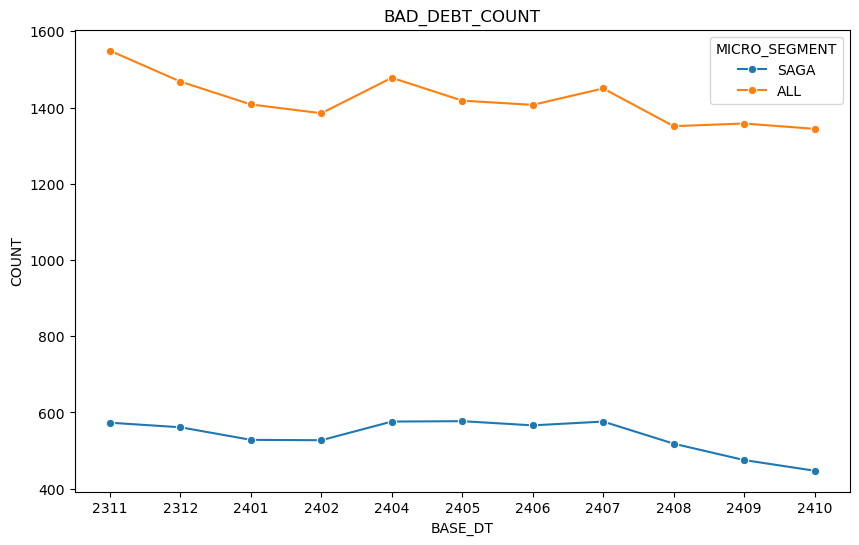

In [58]:
# Plotting
plt.figure(figsize=(10,6))
plt.title("DELINQUENCY_COUNT")
plt.xlabel("BASE_DT")
plt.ylabel("COUNT")
sns.lineplot(data=AllDeliCount, x="BASE_DT", y='ACCT_COUNT', hue='MICRO_SEGMENT', marker="o")

## 1. SAGA monthly new bad debt

In [73]:
# set dataframe for dpd change calculation
DPDMonthly = MLs[['BASE_DT', 'AGREE_ID', 'PASTDUE_DAYS']].reset_index()

In [ ]:
# checking pastdue values
DPDMonthly['PASTDUE_DAYS'].value_counts()

PASTDUE_DAYS
0      1932138
1        37671
30        9675
60        5657
90        4021
120       3283
150       2590
210         61
180          4
Name: count, dtype: int64

In [ ]:
# create pivot table
DPDMonthlyPivot = DPDMonthly.pivot(index='AGREE_ID',
                                   columns='BASE_DT',
                                   values='PASTDUE_DAYS')
    

In [ ]:
# flaten columns
DPDMonthlyPivot = DPDMonthlyPivot.rename_axis(index=None, columns=None).reset_index()

In [90]:
# rename columns
DPDMonthlyPivot.columns = ['AGREE_ID', '20231130', '20231229', '20240131', '20240229', '20240430',
       '20240531', '20240628', '20240731', '20240829', '20240930', '20241031']

In [92]:
DPDMonthlyPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255612 entries, 0 to 255611
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AGREE_ID  255612 non-null  object
 1   20231130  187885 non-null  object
 2   20231229  186569 non-null  object
 3   20240131  183281 non-null  object
 4   20240229  182894 non-null  object
 5   20240430  180496 non-null  object
 6   20240531  180056 non-null  object
 7   20240628  179964 non-null  object
 8   20240731  177991 non-null  object
 9   20240829  178580 non-null  object
 10  20240930  177997 non-null  object
 11  20241031  179387 non-null  object
dtypes: object(12)
memory usage: 23.4+ MB


In [ ]:
# fillna with 0
DPDMonthlyPivot.fillna(0, inplace=True)

# calculate dpd change for all dates
for i in range(1,len(allDates)):
    prevDate = allDates[i-1]
    date = allDates[i]
    DPDMonthlyPivot.loc[:, f'DELINQUENT_{date}'] = DPDMonthlyPivot.apply(
        lambda x: 1 if allDates[prevDate]<30 and allDates[prevDate]>=30)

,AGREE_ID,20231130,20231229,20240131,20240229,20240430,20240531,20240628,20240731,20240829,20240930,20241031
0,CP0010014423730000289028,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CP0010014423730000565013,0,0,0,0,30,60,90,120,150,NaN,NaN
2,CP0010014423730000971013,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
3,CP0010014423730001027013,0,0,0,0,0,0,0,0,0,0,0
4,CP0010014423730001473019,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
255607,CP0016314649870025398004,0,0,0,0,0,0,0,0,NaN,NaN,NaN
255608,CP0016314649870025408001,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
255609,CP0016314649870025418000,0,0,0,0,0,0,0,0,0,0,0
255610,CP0016314649870025438008,0,0,0,0,0,0,0,0,0,0,NaN


In [95]:
DPDMonthlyPivot.sort_values(by='20241031', ascending=False)

,AGREE_ID,20231130,20231229,20240131,20240229,20240430,20240531,20240628,20240731,20240829,20240930,20241031
97556,CP0010305520088943141015,0,0,0,NaN,1,30,30,60,90,120,150
61523,CP0010223562850339174007,0,0,0,0,1,1,30,60,90,120,150
38264,CP0010223562850088504008,0,0,0,0,0,1,30,60,90,120,150
153633,CP0010334260139911215005,60,0,1,30,60,60,60,90,90,120,150
143850,CP0010334260138424548001,0,0,0,0,1,1,30,60,90,120,150
...,...,...,...,...,...,...,...,...,...,...,...,...
255605,CP0016314649870025368007,0,0,0,0,0,0,0,0,NaN,NaN,NaN
255606,CP0016314649870025378006,0,0,0,0,0,0,0,0,NaN,NaN,NaN
255607,CP0016314649870025398004,0,0,0,0,0,0,0,0,NaN,NaN,NaN
255608,CP0016314649870025408001,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
monthly = pd.pivot_table(MLs[MLs['CC_STATUS']=='DELINQUENT'], 
                         values=['GCIF_NO','CURR_LMT_AMT','BAL'],
                         index=['BASE_DT'],
                         columns=['MICRO_SEGMENT'],
                         aggfunc={'GCIF_NO':'count',
                                  'CURR_LMT_AMT':'sum',
                                  'BAL':'sum'})

In [ ]:
print(monthly)

                      BAL                                                      \
MICRO_SEGMENT   0.Younger 1.Young Professional 2.Young Families  3.Mid Lifers   
BASE_DT                                                                         
20240430       88500255.0         1.076458e+09     1.506634e+09  1.939014e+10   
20240531       88303750.0         1.115632e+09     1.644644e+09  1.938466e+10   
20240628       74760372.0         1.258743e+09     1.525908e+09  2.025802e+10   
20240731       74192874.0         1.413881e+09     1.763239e+09  1.950479e+10   
20240829       74056619.0         1.505060e+09     1.508116e+09  1.926079e+10   
20240930       73597484.0         1.750002e+09     1.743633e+09  1.808617e+10   
20241031              NaN         2.157753e+09     1.545042e+09  2.018930e+10   

                                          CURR_LMT_AMT                       \
MICRO_SEGMENT  4.Silver Age  5.Golden Age    0.Younger 1.Young Professional   
BASE_DT                        

1. Hitung total bad debt SAGA all month
2. Bandingkan bad debt SAGA vs all other CC
2. Bandingkan 